In [1]:
import os, tqdm, cv2, random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, callbacks
from tensorflow.keras.utils import Progbar
from matplotlib import pyplot as plt
from tensorflow.keras import optimizers

In [2]:
from utils import *
from network import *

random.seed(777)
np.random.seed(777)
tf.random.set_seed(777)

In [16]:
a = np.load('./data/2d/x_CBCT_size_48.npy')
b = np.load('./data/2d/x_COM_size_48.npy')
c = np.load('./data/2d/x_MCS_size_48.npy')

a_ = np.load('./data/2d/y_CBCT_size_48.npy')
b_ = np.load('./data/2d/y_COM_size_48.npy')
c_ = np.load('./data/2d/y_MCS_size_48.npy')

x = np.concatenate((b,c), axis=0)
y = np.concatenate((b_,c_), axis=0)

x_val = x[-25624:]
y_val = y[-25624:]

x_train = x[:-25624]
y_train = y[:-25624]

np.save('./data/2d/train/x_train.npy', x_train)
np.save('./data/2d/train/y_train.npy', y_train)

np.save('./data/2d/validation/x_val.npy', x_val)
np.save('./data/2d/validation/y_val.npy', y_val)

np.save('./data/2d/test/x_test.npy', a)
np.save('./data/2d/test/y_test.npy', a_)

In [3]:
model = unet(n_class=3, mode='2d')
model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='categorical_crossentropy')

In [4]:
a = np.load('./data/2d/x_CBCT_size_48.npy')
b = np.load('./data/2d/x_COM_size_48.npy')
c = np.load('./data/2d/x_MCS_size_48.npy')

a_ = np.load('./data/2d/y_CBCT_size_48.npy')
b_ = np.load('./data/2d/y_COM_size_48.npy')
c_ = np.load('./data/2d/y_MCS_size_48.npy')

print(a.shape)
print(b.shape)
print(c.shape)
print('===================')
print(a_.shape)
print(b_.shape)
print(c_.shape)

(19711, 48, 48, 1)
(113078, 48, 48, 1)
(42546, 48, 48, 1)
(19711, 48, 48, 3)
(113078, 48, 48, 3)
(42546, 48, 48, 3)


In [5]:
x = np.concatenate((b, c), axis=0)

y = np.concatenate((b_, c_), axis=0)

In [6]:
print(x.shape)
print(y.shape)

(155624, 48, 48, 1)
(155624, 48, 48, 3)


In [7]:
x_test = a
y_test = a_

x_val = x[-25624:]
y_val = y[-25624:]

x_train = x[:-25624]
y_train = y[:-25624]

In [8]:
print('train set : ', x_train.shape, y_train.shape)
print('validation set : ', x_val.shape, y_val.shape)
print('test set : ', x_test.shape, y_test.shape)


train set :  (130000, 48, 48, 1) (130000, 48, 48, 3)
validation set :  (25624, 48, 48, 1) (25624, 48, 48, 3)
test set :  (19711, 48, 48, 1) (19711, 48, 48, 3)


In [9]:
SAVE_PATH = './callback/'
os.makedirs(SAVE_PATH, exist_ok=True)
cb_lists = [callbacks.ModelCheckpoint(SAVE_PATH+'{epoch:02d}_{loss:.4f}_{val_loss:.4f}.h5',
                                      monitor='val_loss', save_best_only=True, save_weights_only=True),
            callbacks.CSVLogger(SAVE_PATH+'result.csv')]

In [10]:
history = model.fit(x_train, y_train, batch_size=20, epochs=10, validation_data=[x_val, y_val],
                    use_multiprocessing=True,
                    callbacks=cb_lists)

Train on 130000 samples, validate on 25624 samples
Epoch 1/10
130000/130000 [==============================] - 340s 3ms/sample - loss: 0.3686 - val_loss: 0.2374
Epoch 2/10
130000/130000 [==============================] - 340s 3ms/sample - loss: 0.1716 - val_loss: 0.2303
Epoch 3/10
130000/130000 [==============================] - 339s 3ms/sample - loss: 0.1226 - val_loss: 0.2169
Epoch 4/10
130000/130000 [==============================] - 339s 3ms/sample - loss: 0.0997 - val_loss: 0.2114
Epoch 5/10
130000/130000 [==============================] - 339s 3ms/sample - loss: 0.0869 - val_loss: 0.2306
Epoch 6/10
130000/130000 [==============================] - 339s 3ms/sample - loss: 0.0757 - val_loss: 0.2355
Epoch 7/10
130000/130000 [==============================] - 339s 3ms/sample - loss: 0.0689 - val_loss: 0.2911
Epoch 8/10
130000/130000 [==============================] - 339s 3ms/sample - loss: 0.0638 - val_loss: 0.2778
Epoch 9/10
130000/130000 [==============================] - 338s 3ms/

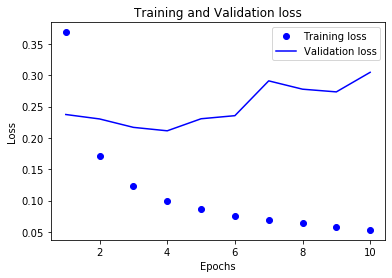

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
test = model.predict(x_test)

TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64

</br>

## Generator

#### * random fliplr 
#### * shuffle order

In [1]:
import os, tqdm, cv2, random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, callbacks
from tensorflow.keras.utils import Progbar
from matplotlib import pyplot as plt
from tensorflow.keras import optimizers

In [2]:
from generator import *
from utils import *
from network import *

random.seed(777)
np.random.seed(777)
tf.random.set_seed(777)

In [ ]:
train_dir = './data/2d/train/'
val_dir = './data/2d/validation/'

train_gen = gen(train_dir, 20)
val_gen = gen(val_dir, 20)

In [ ]:
a, b= next(val_gen)

print(a.shape)
print(b.shape)

In [ ]:
test_dir = './data/2d/test/'

x = np.load(glob.glob(test_dir + 'x_*.npy')[0])
y = np.load(glob.glob(test_dir + 'y_*.npy')[0])

print(x.shape)
print(y.shape)

In [ ]:
model = unet(n_class=3, mode='2d')
model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='categorical_crossentropy')

In [7]:
SAVE_PATH = './callback/'
os.makedirs(SAVE_PATH, exist_ok=True)
cb_lists = [callbacks.ModelCheckpoint(SAVE_PATH+'{epoch:02d}_{loss:.4f}_{val_loss:.4f}.h5',
                                      monitor='val_loss', save_best_only=True, save_weights_only=True),
            callbacks.CSVLogger(SAVE_PATH+'result.csv')]

In [8]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=6500,# 6500
                              epochs=50,
                              validation_data = val_gen,
                              validation_steps = 50,
                              callbacks=cb_lists,
                              verbose = 1)

Epoch 1/50
6500/6500 [==============================] - 639s 98ms/step - loss: 0.3784 - val_loss: 0.2469
Epoch 2/50
6500/6500 [==============================] - 642s 99ms/step - loss: 0.1835 - val_loss: 0.1979
Epoch 3/50
6500/6500 [==============================] - 641s 99ms/step - loss: 0.1375 - val_loss: 0.2196
Epoch 4/50
6500/6500 [==============================] - 642s 99ms/step - loss: 0.1170 - val_loss: 0.1923
Epoch 5/50
6500/6500 [==============================] - 642s 99ms/step - loss: 0.1010 - val_loss: 0.1867
Epoch 6/50
6500/6500 [==============================] - 642s 99ms/step - loss: 0.0908 - val_loss: 0.2035
Epoch 7/50
6500/6500 [==============================] - 641s 99ms/step - loss: 0.0828 - val_loss: 0.1960
Epoch 8/50
6500/6500 [==============================] - 641s 99ms/step - loss: 0.0765 - val_loss: 0.1859
Epoch 9/50
6500/6500 [==============================] - 640s 98ms/step - loss: 0.0718 - val_loss: 0.2424
Epoch 10/50
6500/6500 [==============================] 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3457/6500 [==============>...............] - ETA: 4:57 - loss: 0.0217

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6271/6500 [===========================>..] - ETA: 22s - loss: 0.0209

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



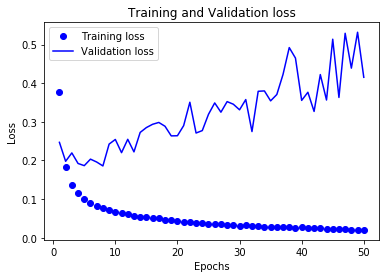

In [9]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()